All data used was pulled from Baseball Reference
- https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml
- https://www.baseball-reference.com/leagues/majors/2022-standard-batting.shtml

In [62]:
import pandas as pd

The follow data comes from the previous season. First I will clean and study the data from this season. Then I hope to make predictions based on this data for the 2023 season and compare it to the real data.

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/Baseball_data_2.csv')

In [64]:
df

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,0.604,75.0,92,5,9,2,2,0,64/H9D,abramcj01
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,0.605,76.0,40,4,6,2,2,0,64/H9D,abramcj01
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,0.603,74.0,52,1,3,0,0,0,6/H,abramcj01
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,1,abreual01
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,...,0.413,20.0,19,0,6,1,0,0,8H/D9,zimmebr01
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,...,0.446,29.0,18,0,5,1,0,0,8H/D9,zimmebr01
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,...,0.563,59.0,5,0,0,0,0,0,/8H,zimmebr01
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,...,0.220,-34.0,1,0,1,0,0,0,H,zimmebr01


In [65]:
df.columns

Index(['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary',
       'Name-additional'],
      dtype='object')

In [66]:
df.isna().sum()

Rk                   0
Name                 0
Age                  0
Tm                   0
Lg                   0
G                    0
PA                   0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
RBI                  0
SB                   0
CS                   0
BB                   0
SO                   0
BA                 122
OBP                121
SLG                122
OPS                122
OPS+               122
TB                   0
GDP                  0
HBP                  0
SH                   0
SF                   0
IBB                  0
Pos Summary          0
Name-additional      0
dtype: int64

Missing values in batting columns are likely to be pitchers. Following code identifies which players are pitchers.

In [6]:
df_batters = df.dropna()

In [7]:
df_batters

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,0.604,75.0,92,5,9,2,2,0,64/H9D,abramcj01
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,0.605,76.0,40,4,6,2,2,0,64/H9D,abramcj01
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,0.603,74.0,52,1,3,0,0,0,6/H,abramcj01
5,6,José Abreu,35,CHW,AL,157,679,601,85,183,...,0.824,134.0,268,19,12,0,4,2,*3D,abreujo02
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,...,0.764,112.0,193,8,10,0,3,4,9D/H8,acunaro01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,...,0.413,20.0,19,0,6,1,0,0,8H/D9,zimmebr01
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,...,0.446,29.0,18,0,5,1,0,0,8H/D9,zimmebr01
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,...,0.563,59.0,5,0,0,0,0,0,/8H,zimmebr01
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,...,0.220,-34.0,1,0,1,0,0,0,H,zimmebr01


In [8]:
df_batters.isna().sum()

Rk                 0
Name               0
Age                0
Tm                 0
Lg                 0
G                  0
PA                 0
AB                 0
R                  0
H                  0
2B                 0
3B                 0
HR                 0
RBI                0
SB                 0
CS                 0
BB                 0
SO                 0
BA                 0
OBP                0
SLG                0
OPS                0
OPS+               0
TB                 0
GDP                0
HBP                0
SH                 0
SF                 0
IBB                0
Pos Summary        0
Name-additional    0
dtype: int64

In [9]:
df['Pitcher'] = False

In [10]:
df.loc[df['BA'].isna(),'Pitcher'] = True

In [11]:
df

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional,Pitcher
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,75.0,92,5,9,2,2,0,64/H9D,abramcj01,False
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,76.0,40,4,6,2,2,0,64/H9D,abramcj01,False
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,74.0,52,1,3,0,0,0,6/H,abramcj01,False
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,...,NaN,0,0,0,0,0,0,1,abreual01,True
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,...,NaN,0,0,0,0,0,0,/1,abreual01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,...,20.0,19,0,6,1,0,0,8H/D9,zimmebr01,False
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,...,29.0,18,0,5,1,0,0,8H/D9,zimmebr01,False
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,...,59.0,5,0,0,0,0,0,/8H,zimmebr01,False
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,...,-34.0,1,0,1,0,0,0,H,zimmebr01,False


In [12]:
df['Pitcher'].sum()

122

In [13]:
df_batters['BA'].mean()

0.20961839080459768

In [14]:
df_batters['OBP'].mean()

0.2773563218390805

In [15]:
df_batters['OPS+'].mean()

72.54597701149426

In [16]:
df

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional,Pitcher
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,75.0,92,5,9,2,2,0,64/H9D,abramcj01,False
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,76.0,40,4,6,2,2,0,64/H9D,abramcj01,False
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,74.0,52,1,3,0,0,0,6/H,abramcj01,False
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,...,NaN,0,0,0,0,0,0,1,abreual01,True
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,...,NaN,0,0,0,0,0,0,/1,abreual01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,...,20.0,19,0,6,1,0,0,8H/D9,zimmebr01,False
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,...,29.0,18,0,5,1,0,0,8H/D9,zimmebr01,False
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,...,59.0,5,0,0,0,0,0,/8H,zimmebr01,False
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,...,-34.0,1,0,1,0,0,0,H,zimmebr01,False


In [17]:
df.drop_duplicates(subset = ['Name']).loc[:,['Name', 'Tm']].to_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/Baseball.csv', index = False)

In [18]:
df_batters['GDP%'] = df_batters['GDP'] / df_batters['AB']

<ipython-input-18-10cf420cbad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batters['GDP%'] = df_batters['GDP'] / df_batters['AB']


In [19]:
df_batters

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional,GDP%
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,75.0,92,5,9,2,2,0,64/H9D,abramcj01,0.017606
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,76.0,40,4,6,2,2,0,64/H9D,abramcj01,0.032000
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,74.0,52,1,3,0,0,0,6/H,abramcj01,0.006289
5,6,José Abreu,35,CHW,AL,157,679,601,85,183,...,134.0,268,19,12,0,4,2,*3D,abreujo02,0.031614
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,...,112.0,193,8,10,0,3,4,9D/H8,acunaro01,0.017131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,...,20.0,19,0,6,1,0,0,8H/D9,zimmebr01,0.000000
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,...,29.0,18,0,5,1,0,0,8H/D9,zimmebr01,0.000000
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,...,59.0,5,0,0,0,0,0,/8H,zimmebr01,0.000000
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,...,-34.0,1,0,1,0,0,0,H,zimmebr01,0.000000


###Model Training
- much of the test data will be numerical due to the nature of using stats to predict stats
- factors such as name will be ignored as it may result in the model making predictions based on 'big names'. We want to ignore this in order for the model to avoid the biases that people can develop
- The model selected will be linear regression because many of the datapoints are linearly correlated

In [20]:
import seaborn as sns

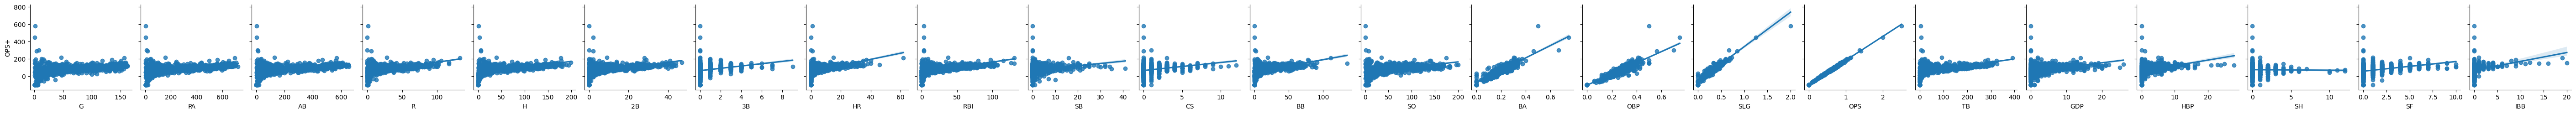

In [85]:
sns.pairplot(data = df_batters, x_vars = cols, y_vars ='OPS+', kind = 'reg')

- one interesting observation is that GDP has a slight positive correlation with OPS+. This may occur due to more GDP being a result of more plate apperances, but AB appears to have a less significant correlation with OPS+. Adjustment for this by creating a rate based stat with PA creates a slightly less positive correlation, but also produces less certainty. Changing to AB results in more uncertainty.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
cols = ['G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']
X = df_batters[cols]
y = df_batters['OPS+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [47]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = linreg.predict(X_test)

In [69]:
list(zip(cols, linreg.coef_))

[('G', 0.01863696815377888),
 ('PA', 0.035970259592092296),
 ('AB', -0.028137228679429225),
 ('R', -0.0428691970754736),
 ('H', -0.022573215996365463),
 ('2B', -0.026364388551523444),
 ('3B', 0.009460512771281751),
 ('HR', 0.010876500096209475),
 ('RBI', 0.0016828979265127197),
 ('SB', 0.05972499611554641),
 ('CS', -0.08033671265606811),
 ('BB', -0.01755670804068234),
 ('SO', -0.017929954099803986),
 ('BA', -8.458485492321314),
 ('OBP', -229.5605613078765),
 ('SLG', -297.23091099410834),
 ('OPS', 552.383446076474),
 ('TB', 0.002612920132411576),
 ('GDP', -0.004657233883762612),
 ('HBP', 0.005458930262206911),
 ('SH', 0.006615873849257853),
 ('SF', 0.020808822669250937),
 ('IBB', 0.09217505570396435)]

In [70]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.3675813551760245


Initial model testing provides an RMSE of 13.8. Unfortunately this level of inaccuracy makes the model nearly unviable as being off by almost 14% of how good a batter is provides very unreliable results
- cols = ['BA', 'AB', 'OBP', 'HR', 'RBI', 'R']
Inclusion of significantly more data reduces error to about 3. This demonstrates improvement and potential for better results with new statistics. Testing on 2023 data will follow.
- cols = 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'

In [71]:
df_new = pd.read_csv('/content/drive/MyDrive/Machine Learning 23 24/Data/Baseball_data.csv')

In [72]:
df_new_batters = df_new.dropna()

In [73]:
df_new_batters.isna().sum()

Rk                 0
Name               0
Age                0
Tm                 0
Lg                 0
G                  0
PA                 0
AB                 0
R                  0
H                  0
2B                 0
3B                 0
HR                 0
RBI                0
SB                 0
CS                 0
BB                 0
SO                 0
BA                 0
OBP                0
SLG                0
OPS                0
OPS+               0
TB                 0
GDP                0
HBP                0
SH                 0
SF                 0
IBB                0
Pos Summary        0
Name-additional    0
dtype: int64

In [80]:
X_new = df_new_batters[cols]
y_new = df_new_batters['OPS+']

In [81]:
y_new.shape

(763,)

In [82]:
y_pred_new = linreg.predict(X_new)

In [83]:
y_pred_new.shape

(763,)

In [84]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_new, y_pred_new)))

8.05315138672726


An error of 8 points between years demonstrates the potential for a model that seems to have some understanding of what correlates to OPS+ from statistics. Future analysis would ideally include statistics that attempt to provide more understanding of how skilled a batter is. Stats such as BABIP or exit velocity and launch angle could be incorporated to give the model a better understanding of what correlates to success.